# DNN Classification

Deep Neural Network

DNN 은 Logistic Regression 모델을 깊게 쌓아서, 선형/비선형 데이터셋 및 분류/회귀 문제 모두에 사용할수 있습니다. 하지만, DNN은 최적화를 위한 학습시간이 오래 걸리기때문에 정말 고차원 모델이 필요하고 데이터의 양이 많은 경우를 제외하고는 다른 전통적인 알고리즘 시도 후, 시도 하는 것을 추천합니다.

Hidden Layer내의 노드 갯수와 Hidden Layer 의 층수 사이의 표현력 관계는 아래 그림에서 볼수 있습니다. 

Hidden Layer내의 노드 갯수가 많아지면 저차원의 다양한 결정 경계를 그릴 수 있습니다.

![Hidden Unit Effect](https://cdn-images-1.medium.com/max/1600/1*RT-R9WeLjR_mn1irANbWfA.png)

![Hidden Unit Effect](https://cdn-images-1.medium.com/max/1600/1*vtWZRVA0vIm6XR-LLoz0aQ.png)

Hidden Layer의 층 수가 깊어지면 저차원으로는 표현할 수 없는 저차원을 조합한 고차원의 다양한 결정 경계를 그릴 수 있게 됩니다. 

![Hidden Layer Effect](https://cdn-images-1.medium.com/max/1600/1*mqTfsRjBrdjY2FsEuqqpaA.png)

![Hidden Layer Effect](https://cdn-images-1.medium.com/max/1600/1*eAw564GuxOlRMySM93dw7A.png)


Using TensorFlow backend.


data shape: np_data_xs=(10000, 10), np_data_ys=(10000,)
train shape: np_train_xs=(7000, 10), np_train_ys=(7000,)
test shape: np_test_xs=(3000, 10), np_test_ys=(3000,)

model
Model: "dnnclassifier_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


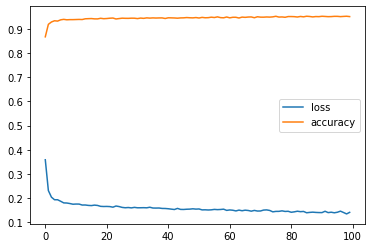

acc=0.93433
classification_report
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1021
           1       0.94      0.92      0.93      1011
           2       0.94      0.98      0.96       968

    accuracy                           0.93      3000
   macro avg       0.93      0.94      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, preprocessing, model_selection, metrics
from keras import models, layers, optimizers, utils

# 데이터
np.random.seed(0)
n_samples = 10000
n_features = 10
n_class = 3
np_data_xs, np_data_ys = datasets.make_classification(
    n_samples=n_samples, # 데이터 수
    n_features=n_features, # X feature 수
    n_informative=n_class,
    n_classes=3, # Y class 수
    random_state=0) # 난수 발생용 Seed 값
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
np_train_xs, np_test_xs, np_train_ys, np_test_ys = model_selection.train_test_split(
    np_data_xs, np_data_ys, 
    test_size=0.3, shuffle=True, random_state=2)
print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))

# 전처리
scaler_xs = preprocessing.StandardScaler()
np_train_scale_xs = scaler_xs.fit_transform(np_train_xs)
np_test_scale_xs = scaler_xs.transform(np_test_xs)

np_train_onehot_ys = utils.np_utils.to_categorical(np_train_ys, n_class)
np_test_onehot_ys = utils.np_utils.to_categorical(np_test_ys, n_class)

# 모델
class DnnClassifier(models.Sequential):
    def __init__(self, n_i, n_hs, n_o):
        super().__init__()
        self.add(layers.Dense(n_i, activation='relu', input_shape=(n_i,)))
        for l, n_h in enumerate(n_hs):
            self.add(layers.Dense(n_h, activation='relu'))
        self.add(layers.Dense(n_o, activation = 'softmax'))
        sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        self.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

models = [
    DnnClassifier(n_i = n_features, n_hs = [16, 16], n_o = n_class)
]

for model in models:
    # 학습
    print("\nmodel")
    model.summary()
    history = model.fit(np_train_scale_xs, np_train_onehot_ys, epochs=100, batch_size=10, verbose=0)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['accuracy'], label='accuracy')    
    plt.legend()
    plt.show()    

    # 평가
    np_pred_ys = model.predict_classes(np_test_scale_xs)

    acc = metrics.accuracy_score(np_test_ys, np_pred_ys)
    print("acc={:.5f}".format(acc))

    cr = metrics.classification_report(np_test_ys, np_pred_ys)
    print("classification_report\n", cr)